In [1]:
import numpy as np
import ytree
import yt 
import os
import napari 

In [2]:
v = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


In [3]:
ddir = yt.config.ytcfg.get("yt", "test_data_dir")
a = ytree.load(os.path.join(ddir, "ytree", "tiny_ctrees/locations.dat"))

my_tree = a[0]

fields = ["position"]
data = {field: my_tree["forest", field].T for field in ["uid"] + fields}

times = my_tree["forest", "time"]
utimes = np.unique(times)
tindex = np.digitize(times, utimes) - 1
data["time_index"] = tindex

track_data = np.vstack([data[field] for field in ["uid", "time_index"] + fields]).T

# construct the graph dict
graph = {}
for my_node in my_tree["forest"]:
    my_anc_uids = [my_anc["uid"] for my_anc in my_node.ancestors]
    if my_anc_uids:
        graph[my_node["uid"]] = my_anc_uids


Additional features and improved performance (usually) by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("/home/chavlin/hdd/data/yt_data/yt_sample_sets/ytree/tiny_ctrees/locations.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


Loading tree roots: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 160164.35it/s]


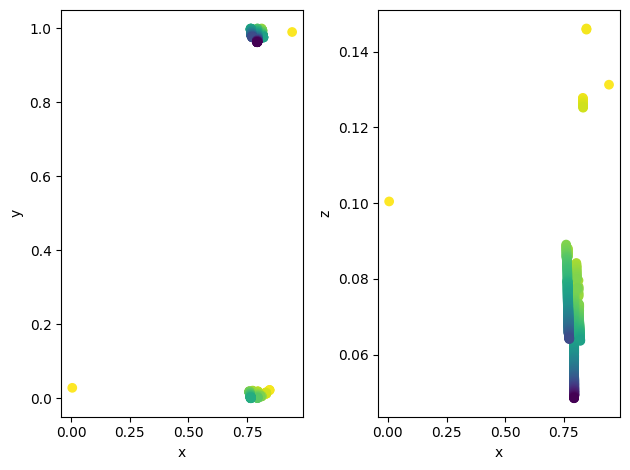

In [4]:
import matplotlib.pyplot as plt 

def plot_current(track_data):
    f, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].scatter(track_data[:,2], track_data[:,3], c=track_data[:,1])
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    
    axs[1].scatter(track_data[:,2], track_data[:,4], c=track_data[:,1])
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('z')
    f.set_tight_layout('tight')
    return f, axs

plot_current(track_data);

periodic? maybe shift?

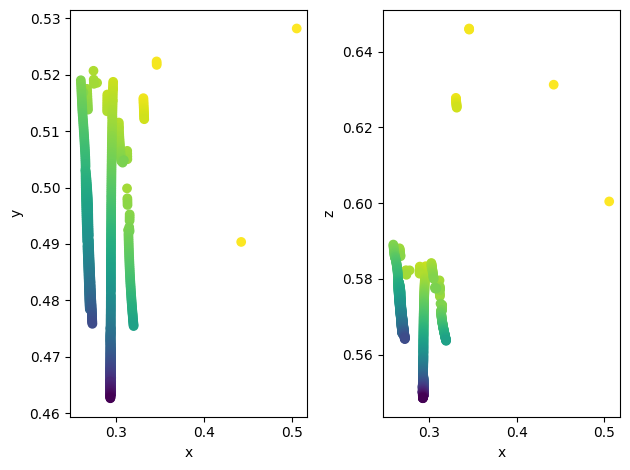

In [5]:
for i in range(3):
    track_data[:,i+2] = track_data[:,i+2] - 0.5
    track_data[:,i+2][track_data[:,i+2]<0] = track_data[:,i+2][track_data[:,i+2]<0] + 1


plot_current(track_data);

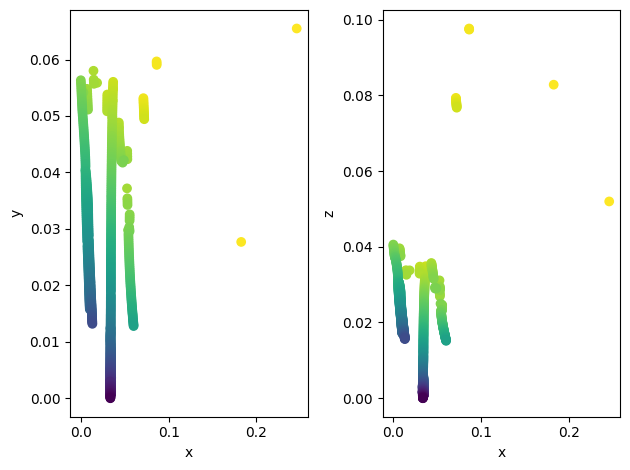

In [6]:
# shift to 0 origin
for i in range(3):    
    track_data[:,i+2] = (track_data[:,i+2] - track_data[:,i+2].min())

plot_current(track_data);

In [7]:
# rescale to simplify napari viewer
track_data[:,2:]  = track_data[:,2:]  * 400

In [8]:
track_data[:,2].min(), track_data[:,2].max()

(unyt_quantity(0., '(dimensionless)'),
 unyt_quantity(98.31008334, '(dimensionless)'))

In [9]:
v.layers.clear()
v.add_tracks(track_data, graph=graph)

<Tracks layer 'Tracks' at 0x7f972ad8d670>

In [10]:
times = my_tree["forest", "time"]
times.shape

(691,)

In [11]:
n_pixs = []
for i in range(3):    
    n_pixs.append(int(np.ceil(track_data[:,i+2:].max())))
n_pixs

[99, 40, 40]

In [12]:
bg = np.ones(n_pixs)
v.add_image(bg, opacity=0.1)

<Image layer 'bg' at 0x7f972ade9190>

In [15]:
from IPython.display import Image
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})
p.save('tmp.png')
Image(filename='tmp.png') 

  File "/home/chavlin/.pyenv/versions/3.9.16/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/chavlin/.pyenv/versions/3.9.16/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/traitlets/config/application.py", line 985, in launch_instance
    app.start()
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
    self.io_loop.start()
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/home/chavlin/.pyenv/versions/3.9.16/lib/python3.9/asyncio/base_ev

'tmp.png'